In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("uber.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
#to drop the column which is not required
df = df.drop(['Unnamed: 0', 'key'], axis = 1)

In [ ]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.shape #to get total rows and columns

(200000, 7)

In [ ]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df['dropoff_latitude'].fillna(value = df['dropoff_latitude'].mean(), inplace = True)
df['dropoff_longitude'].fillna(value = df['dropoff_longitude'].mean(), inplace = True)

In [ ]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors = 'coerce')

In [ ]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
#to segregrate each time of date and time

df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [ ]:
df = df.drop('pickup_datetime', axis = 1)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [ ]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

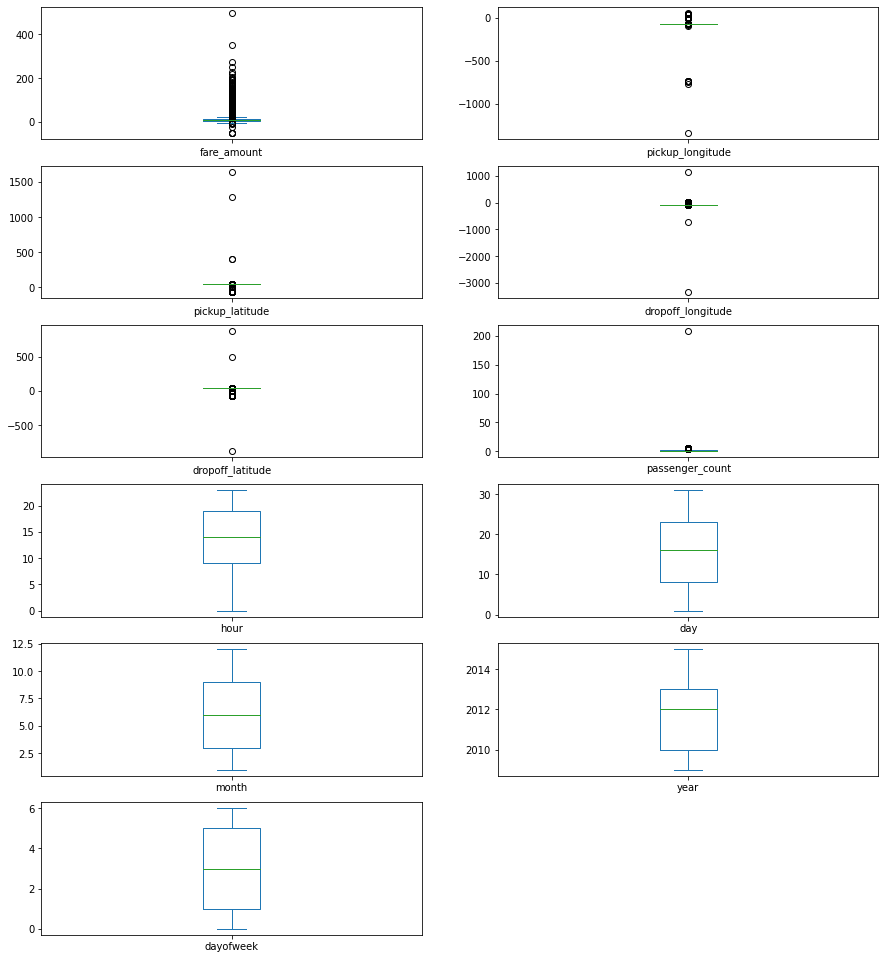

In [ ]:
#boxplot to check outliers
df.plot(kind = "box", subplots = True, layout = (7,2), figsize = (15,20))

In [ ]:
#using the InterQuartile range to fill the values
def remove_outlier(df1, col):
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5*IQR
  upper_whisker = Q3 + 1.5*IQR
  df[col] = np.clip(df1[col], lower_whisker, upper_whisker)
  return df1

def treat_outliers_all(df1, col_list):
  for c in col_list:
    df1 = remove_outlier(df, c)
  return df1

In [ ]:
df = treat_outliers_all(df, df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

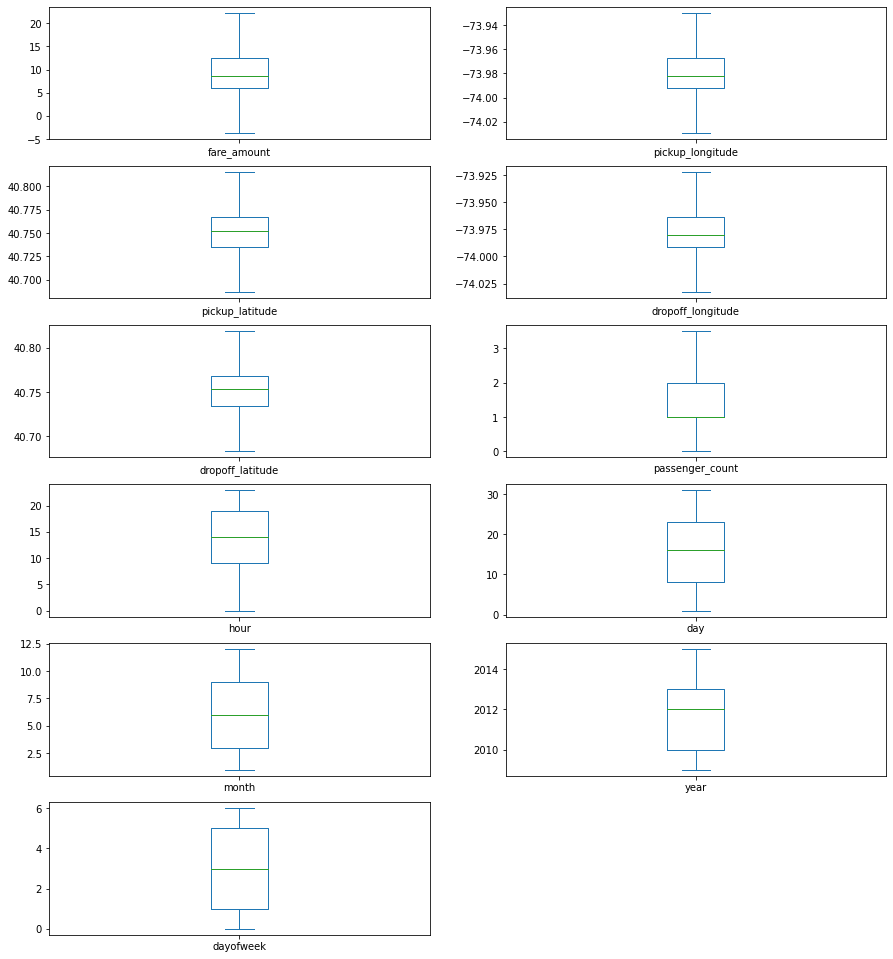

In [ ]:
df.plot(kind = "box", subplots = True, layout = (7,2), figsize = (15,20))

In [ ]:
pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#pip install haversine
import haversine as hs
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
  long1, lati1, long2, lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos], df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]]
  loc1 = (lati1, long1)
  loc2 = (lati2, long2)
  c = hs.haversine(loc1, loc2) 
  travel_dist.append(c)

print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [ ]:
#uber doesn't travel distance of 130 km, so minimise the distance

df = df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observations in the dataset:", df.shape)


Remaining observations in the dataset: (200000, 12)


In [ ]:
#finding incorrect latitude (Less than or greater than 90) and longitude (greater than or less than )
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) | (df.pickup_latitude < -90) | 
                               (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) |
                               (df.pickup_longitude > 180) | (df.pickup_longitude < -180) |
                               (df.dropoff_latitude > 90) | (df.dropoff_latitude < -90) 
                                ]

In [ ]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [ ]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

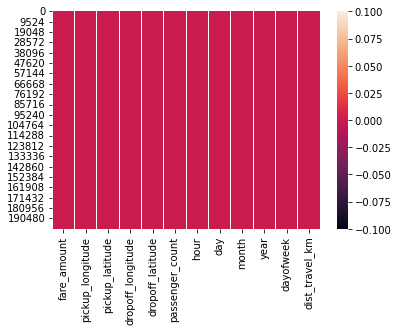

In [ ]:
sns.heatmap(df.isnull()) #free of null values

In [ ]:
corr = df.corr() #function to find the correlation
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.786388
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.048450
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.073364
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325,-0.046578,-0.004027,0.002394,0.011355,-0.003349,0.155245
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.052703
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009884
hour,-0.023623,0.011579,0.029681,-0.046578,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.035708
day,0.004534,-0.003204,-0.001553,-0.004027,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.001709
month,0.030817,0.001169,0.001562,0.002394,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.010050
year,0.141277,0.010198,-0.014243,0.011355,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.022294


In [ ]:
x =df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33)

In [ ]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
regression.intercept_  #to find the linear intercept

3600.3780572254773

In [ ]:
regression.coef_   #to find the linear coefficient

array([ 2.50403894e+01, -7.48089834e+00,  1.96285440e+01, -1.77599126e+01,
        6.49228284e-02,  6.54624666e-03,  3.45622082e-03,  5.90793169e-02,
        3.66393607e-01, -3.31113754e-02,  1.84585394e+00])

In [ ]:
prediction = regression.predict(X_test)   #to predict the target values

In [ ]:
print(prediction)

[ 8.47158163 11.22154417 10.19798048 ...  6.36937863  7.88075432
  5.91829343]


In [ ]:
y_test

17548      7.30
141177    11.50
24741     22.25
8344      12.50
26637     22.25
          ...  
35186     15.50
80689      5.00
188032     4.10
7414       9.00
109519     4.50
Name: fare_amount, Length: 66000, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.6656038634808641

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, prediction)

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

3.150322186376296

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators =100)
rf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([ 8.121 , 12.0875,  7.5515, ...,  5.181 ,  7.285 ,  5.078 ])

In [ ]:
R2_random = r2_score(y_test, y_pred)
R2_random

0.7997206170936028

In [ ]:
MSE_random = mean_squared_error(y_test, y_pred)
MSE_random

5.944083984604094

In [ ]:
RMSE_random = np.sqrt(MSE_random)
RMSE_random

2.4380492170184125